# 요인 분석 진행

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법이다.

다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법이다. 

또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있다.

<요인분석방법>

요인분석방법은 자료의 총분산을 구성하는 요소 중 어느 부분을 사용하느냐에 따라 다음과 같은 두 가지로 구성됩니다.

① 주성분분석(principle component analysis) : 원래의 변수들의 분산 중 가급적 많은 부분을 설명하는 소수의 요인을 추출하는데 목적이 있고, 공통분산이 크다는 사실을 아는 경우에 적절합니다. 주성분분석의 경우 상관행렬의 대각선에 1이 사용되는데 이는 모든 분산이 공유된다는 것을 의미합니다.

② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/London/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 90852
슈퍼호스트 제거 : 90463
리뷰수 제거 : 50711
숙소_유형 제거 : 34776
12개월_리뷰수 0개 제거 : 31852
욕실수, 침실수, 침대수 제거 후 : 31781
리뷰 결측치 제거 후 : 31781
예약가능여부 : 31779


In [23]:

# 수용인원수 이상치 처리 (숙소 유형별 처리)
accommodates_type_list = df['숙소_유형'].unique().tolist()

def delete_outlier_IQR_InnerFence(column_name):
    # 전역 변수 선언
    global df
    # 숙소 유형별 Inner Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = df['숙소_유형'] == type
        Q1 = df[column_name][condition_room_type].quantile(.25)
        Q3 = df[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = df[column_name][condition_room_type] > (Q3 + IQR * 1.5)
        accommodates_upper_outliers = df[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        df = df.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {df.shape[0]}개')

delete_outlier_IQR_InnerFence('수용_인원수')
print("-" * 60)

# 침실수 이상치 처리
delete_outlier_IQR_InnerFence('침실수')
print("-" * 60)

# 침대수 이상치 처리
delete_outlier_IQR_InnerFence('침대수')
print("-" * 60)

# 욕실수 이상치 처리
delete_outlier_IQR_InnerFence('욕실수')
print("-" * 60)



# 가격 이상치 처리 (숙소 유형별 처리)

accommodates_type_list = df['숙소_유형'].unique().tolist()

def delete_outlier_IQR_OuterFence(column_name):
    # 전역 변수 선언
    global df
    # 숙소 유형별 Outer Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = df['숙소_유형'] == type
        Q1 = df[column_name][condition_room_type].quantile(.25)
        Q3 = df[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = df[column_name][condition_room_type] > (Q3 + IQR * 3)
        accommodates_upper_outliers = df[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        df = df.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {df.shape[0]}개')

delete_outlier_IQR_OuterFence('숙소_가격')
print("-" * 60)

# 가격이 0원인 숙소 제거
condition_price_0 = df['숙소_가격'] == 0
df = df[~condition_price_0]
print(f'"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : {df.shape[0]}개')

Entire home/apt 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 31344개
Private room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 30738개
------------------------------------------------------------
Entire home/apt 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 29949개
Private room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 29711개
------------------------------------------------------------
Entire home/apt 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 29656개
Private room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 28868개
------------------------------------------------------------
Entire home/apt 데이터 중 욕실수 Upper_outlier 제거 후 데이터 개수 : 27820개
Private room 데이터 중 욕실수 Upper_outlier 제거 후 데이터 개수 : 27518개
------------------------------------------------------------
Entire home/apt 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 27217개
Private room 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 27084개
------------------------------------------------------------
"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : 27084개


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27084 entries, 0 to 90211
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        27084 non-null  int64  
 1   호스트_id       27084 non-null  int64  
 2   슈퍼호스트        27084 non-null  object 
 3   숙소_수         27084 non-null  float64
 4   숙소_지역        27084 non-null  object 
 5   숙소_유형        27084 non-null  object 
 6   수용_인원수       27084 non-null  int64  
 7   욕실수          27084 non-null  float64
 8   침실수          27084 non-null  float64
 9   침대수          27084 non-null  float64
 10  편의시설         27084 non-null  object 
 11  숙소_가격        27084 non-null  float64
 12  최소_숙박일       27084 non-null  int64  
 13  최대_숙박일       27084 non-null  int64  
 14  리뷰수          27084 non-null  int64  
 15  30일_리뷰수      27084 non-null  int64  
 16  리뷰점수         27084 non-null  float64
 17  숙소_정확성_리뷰점수  27084 non-null  float64
 18  숙소_청결도_리뷰점수  27084 non-null  float64
 19  숙소_체크인_리뷰

In [25]:
df_temp = df.copy()
df_temp['좋은숙소'] = ((df_temp['리뷰점수'] >= 4.9) & (df_temp['리뷰수'] >= 5) & (df_temp['슈퍼호스트'] == 't')).astype(int)
df_temp.head(3)

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징,12개월_리뷰수,예약가능여부,마지막_리뷰,좋은숙소
0,312761,1608226,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,...,5.00,4.89,4.93,0.86,https://www.airbnb.com/rooms/312761,Entire rental unit,26,t,2024-02-03,1
1,13913,54730,t,5.0,Islington,Private room,1,1.0,1.0,1.0,...,4.83,4.70,4.70,0.25,https://www.airbnb.com/rooms/13913,Private room in rental unit,1,t,2023-11-26,0
2,15400,60302,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,...,4.83,4.93,4.74,0.54,https://www.airbnb.com/rooms/15400,Entire rental unit,2,t,2023-05-01,0


In [26]:
df_temp.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', 'url', '숙소_특징', '12개월_리뷰수',
       '예약가능여부', '마지막_리뷰', '좋은숙소'],
      dtype='object')

PCA 전 상관계수 확인

In [27]:
# 상관계수에 불필요한 컬럼들 제거
df_clean = df_temp.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])


In [28]:
df_clean.head(3)

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수,좋은숙소
0,3.0,2,1.0,1.0,1.0,160.0,9,180,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,26,1
1,5.0,1,1.0,1.0,1.0,65.0,1,29,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,1,0
2,1.0,2,1.0,1.0,1.0,120.0,4,30,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,2,0


In [29]:
df_clean.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수,좋은숙소
숙소_수,1.000000,0.059553,0.014624,0.006444,0.061265,0.083512,0.015957,-0.000999,-0.049243,-0.024427,-0.130202,-0.118361,-0.086717,-0.134818,-0.154093,-0.062881,-0.136585,-0.047409,-0.048720,-0.064312
수용_인원수,0.059553,1.000000,0.331864,0.727628,0.807863,0.604829,-0.004229,-0.007670,-0.100419,0.004535,-0.090024,-0.098134,-0.084401,-0.092547,-0.074569,-0.026767,-0.121356,-0.001671,-0.062222,-0.098474
욕실수,0.014624,0.331864,1.000000,0.439540,0.300560,0.325418,-0.004649,-0.003274,-0.045803,-0.038721,0.018804,0.010665,-0.001410,-0.026448,-0.012039,0.026978,0.018416,-0.044211,-0.047577,-0.008701
침실수,0.006444,0.727628,0.439540,1.000000,0.679299,0.533944,-0.007676,-0.002818,-0.100599,-0.057069,0.018338,-0.001063,-0.004648,-0.027080,-0.002684,-0.004284,-0.004164,-0.066516,-0.084327,-0.030809
침대수,0.061265,0.807863,0.300560,0.679299,1.000000,0.489919,-0.004923,-0.003744,-0.070744,-0.022292,-0.069003,-0.079181,-0.063170,-0.061137,-0.053285,-0.037490,-0.091163,-0.036242,-0.055029,-0.078012
숙소_가격,0.083512,0.604829,0.325418,0.533944,0.489919,1.000000,0.022816,-0.007652,-0.118208,-0.099160,0.036714,0.017624,0.059680,-0.023954,-0.020872,0.200002,-0.047590,-0.116883,-0.136887,-0.026781
최소_숙박일,0.015957,-0.004229,-0.004649,-0.007676,-0.004923,0.022816,1.000000,-0.001678,-0.042102,-0.069859,0.034032,0.028181,0.015703,0.034538,0.029517,0.028656,0.019897,-0.109499,-0.096879,-0.000612
최대_숙박일,-0.000999,-0.007670,-0.003274,-0.002818,-0.003744,-0.007652,-0.001678,1.000000,0.024843,0.004722,-0.005634,-0.004695,-0.012790,-0.001072,-0.003597,-0.003054,-0.001116,0.005478,0.012134,-0.002538
리뷰수,-0.049243,-0.100419,-0.045803,-0.100599,-0.070744,-0.118208,-0.042102,0.024843,1.000000,0.309587,0.050174,0.083613,0.071950,0.093914,0.078972,0.057904,0.096975,0.434834,0.652998,0.069393
30일_리뷰수,-0.024427,0.004535,-0.038721,-0.057069,-0.022292,-0.099160,-0.069859,0.004722,0.309587,1.000000,0.052186,0.058655,0.062153,0.050533,0.070111,0.050097,0.081445,0.683393,0.567601,0.050633


In [30]:
df_clean_corr = df_clean.corr()

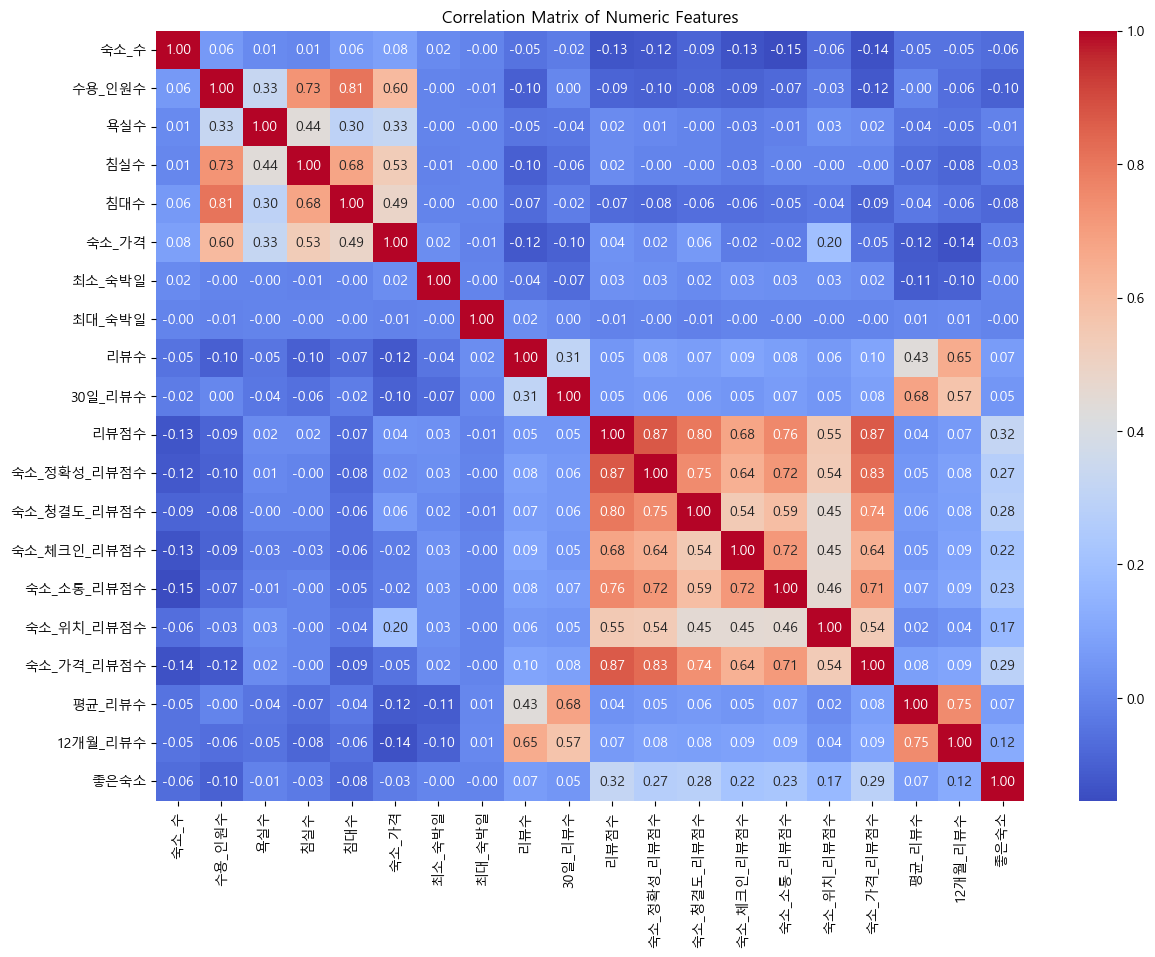

In [31]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

# PCA 분석

In [32]:
df_clean.columns

Index(['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '12개월_리뷰수', '좋은숙소'],
      dtype='object')

In [33]:
df_reviews = df_clean[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

설명된 분산 비율 확인 및 Scree plot 그리기
 - 주성분 개수 찾기

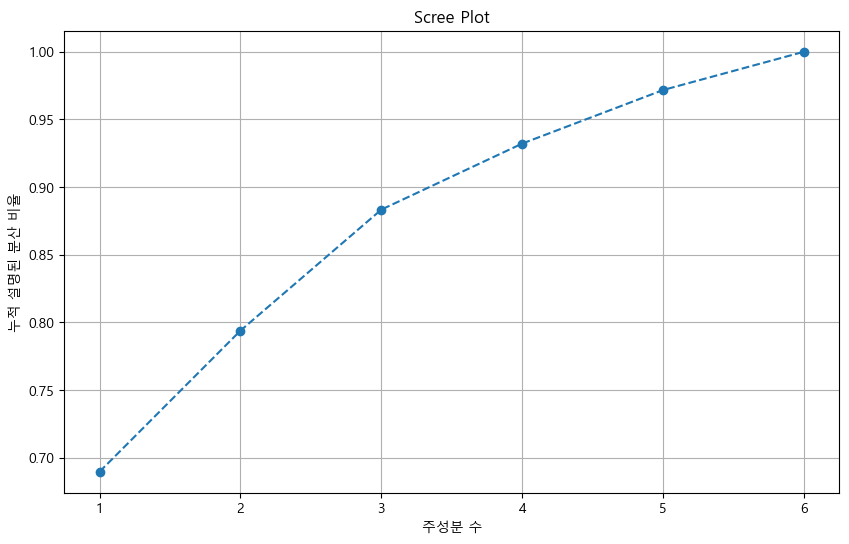

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(df_reviews.values)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA()
pca.fit(x_standardized)

# 설명된 분산 비율
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('주성분 수')
plt.ylabel('누적 설명된 분산 비율')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


결과 확인

90%가 넘어가는 주성분의 수 : 4

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

x = df_reviews.values
y = df_clean['리뷰점수'].values

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=4)  # 주성분의 수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca.head()

,pc1,pc2,pc3,pc4
0,-1.694062,-0.004727,0.128013,-0.052276
1,0.058708,0.147530,0.263044,-0.097056
2,-0.843246,-0.470885,0.230044,0.312698
3,0.461245,1.475392,0.258408,-0.377005
4,-0.969716,-0.107937,-0.226386,0.024626


In [36]:
pca.explained_variance_ratio_

array([0.68956366, 0.1042757 , 0.0894763 , 0.04881885])

In [37]:
sum(pca.explained_variance_ratio_)

0.9321345175743475

리뷰 점수
- '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수' , '숙소_소통_리뷰점수'
- [0.64872037, 0.12489846, 0.10042543, 0.05315938]
- 0.9272036381646421

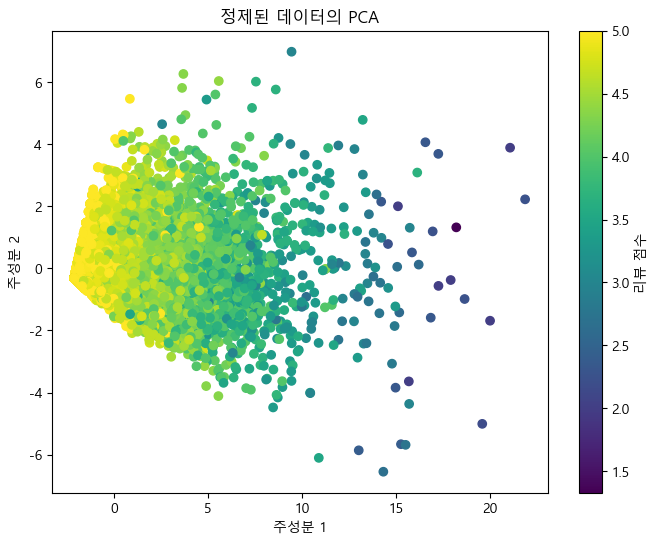

In [38]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

K-means 클러스터링

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


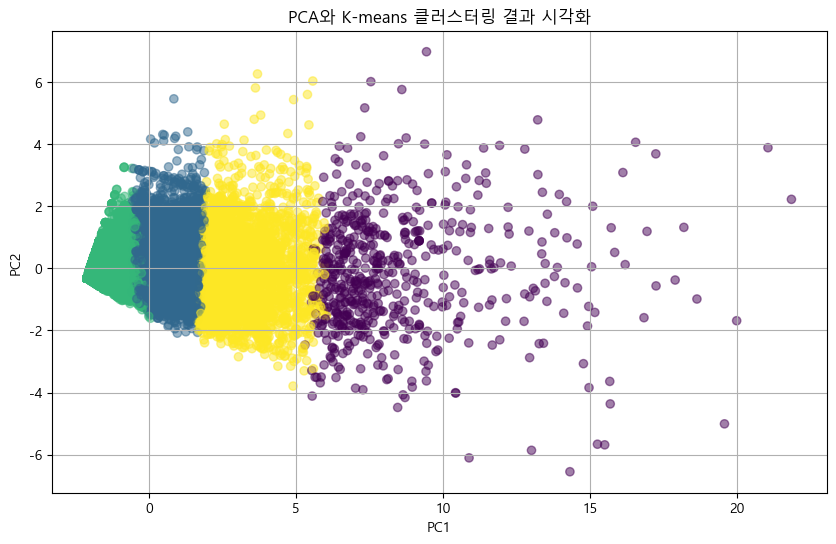

In [39]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)  # 클러스터 수는 예시로 3을 사용
clusters = kmeans.fit_predict(df_pca)

# 클러스터 결과를 데이터프레임에 추가
df_pca['cluster'] = clusters

# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=df_pca['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA와 K-means 클러스터링 결과 시각화')
plt.grid(True)
plt.show()

In [40]:
# 클러스터 특성 파악
cluster_summary = df_clean.groupby(df_pca['cluster']).mean()
print(cluster_summary)

              숙소_수    수용_인원수       욕실수       침실수       침대수       숙소_가격  \
cluster                                                                  
0.0      20.874074  3.007407  1.233333  1.333333  1.711111  139.177778   
1.0      16.904309  2.781198  1.195020  1.284835  1.557918  124.734751   
2.0      17.993036  2.789807  1.186768  1.263374  1.551440  124.951567   
3.0      27.111446  2.792169  1.184488  1.256024  1.557229  127.346386   

           최소_숙박일         최대_숙박일        리뷰수   30일_리뷰수      리뷰점수  숙소_정확성_리뷰점수  \
cluster                                                                        
0.0      4.074074     580.977778  76.933333  0.770370  4.751333     4.796815   
1.0      5.326245  294267.537773  85.097929  0.678791  4.760414     4.808400   
2.0      4.734093     565.410256  87.769864  0.681228  4.761054     4.809680   
3.0      4.802711     593.899096  79.905120  0.685241  4.753148     4.806145   

         숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  숙소_가격_리뷰점수  \
c

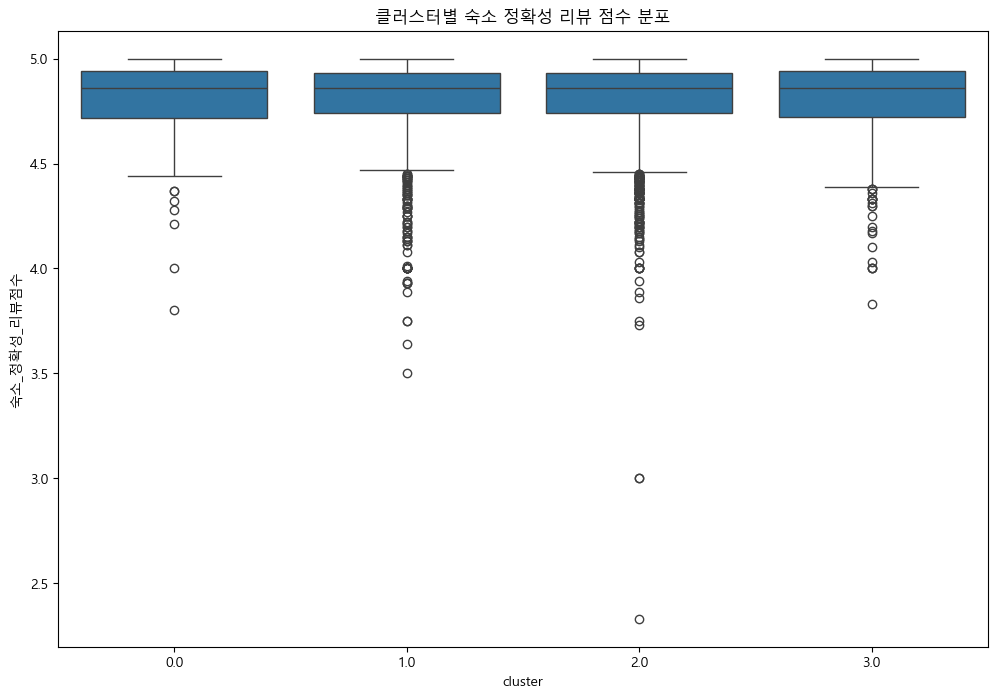

In [41]:
# 클러스터링 결과 시각화
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x=df_pca['cluster'], y=df_clean['숙소_정확성_리뷰점수'])
plt.title('클러스터별 숙소 정확성 리뷰 점수 분포')
plt.show()

In [42]:
#  모델 성능 평가
# 실루엣 점수 계산
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_pca[['pc1', 'pc2', 'pc3', 'pc4']], df_pca['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.34739118288669424


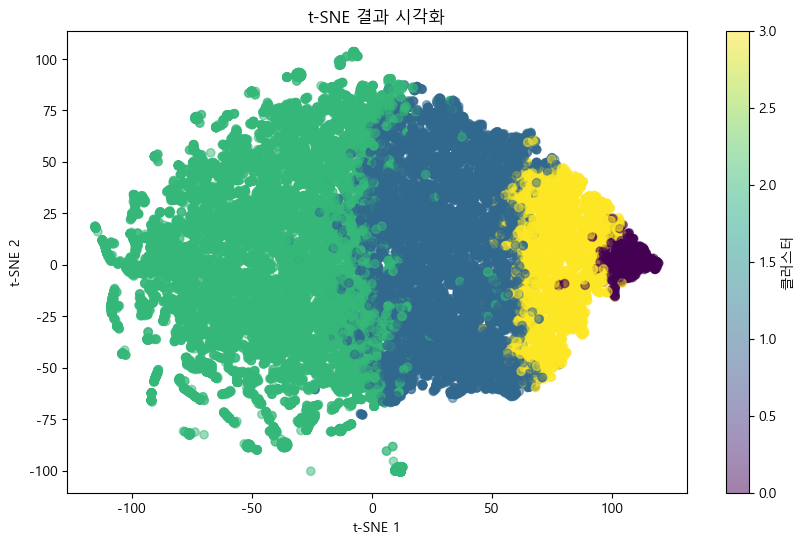

In [43]:
# 추가적인 차원 축소 및 시각화
# t-SNE 적용
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(x_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_pca['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE 결과 시각화')
plt.colorbar(label='클러스터')
plt.show()


In [44]:
# 분류 모델 적용
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_pca[['pc1', 'pc2', 'pc3', 'pc4']], df_pca['cluster'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.99      0.99      2660
           2       1.00      1.00      1.00      4308
           3       1.00      0.99      1.00       981

    accuracy                           0.99      8126
   macro avg       0.99      0.99      0.99      8126
weighted avg       0.99      0.99      0.99      8126



In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(df_reviews)

# PCA 수행
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x_standardized)

# 로딩 값 확인
loadings = pca.components_

# 로딩 값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_reviews.columns)
print(loading_df)

                  PC1       PC2       PC3       PC4
숙소_정확성_리뷰점수 -0.446804  0.075113  0.242384 -0.209302
숙소_청결도_리뷰점수 -0.405636  0.130869  0.582255  0.485564
숙소_체크인_리뷰점수 -0.394366  0.219438 -0.627393  0.592487
숙소_소통_리뷰점수  -0.417468  0.253742 -0.371604 -0.547410
숙소_위치_리뷰점수  -0.329290 -0.927981 -0.133511  0.025099
숙소_가격_리뷰점수  -0.444512  0.059527  0.229548 -0.262852


추출한 주성분으로 회귀분석

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4']]
y = df_regression['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
# 모델 평가
y_pred = lr.predict(X_test)

In [48]:
y_pred

array([4.80762568, 4.92359819, 4.88390871, ..., 4.83292815, 4.90475347,
       4.89117773])

In [49]:
y_test

15498    4.80
3426     4.75
12648    5.00
2595     4.88
323      4.89
         ... 
8710     5.00
26190    4.00
13094    4.60
26399    5.00
5770     5.00
Name: 리뷰점수, Length: 5417, dtype: float64

In [50]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.12
MAE: 0.08


In [51]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.86


In [52]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.72


In [53]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 4.195e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:37:54   Log-Likelihood:                 19788.
No. Observations:               27084   AIC:                        -3.957e+04
Df Residuals:                   27079   BIC:                        -3.953e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7194      0.001   6664.196      0.0

PCA 모델에서 누적된 분산 비율이 70~90% 범위인 경우 충분히 설명력이 있다고 판단할 수 있음
 - 이 경우 두 가지 선택권이 있음
 - - 데이터 특징의 90%를 살려 차원을 조금 늘릴지(여기서는 주성분 개수)
 - - 데이터 특징의 70%를 살려 차원을 최대한 축소할 지
 - 선택은 현재 시스템의 리소스 상황을 고려함

그래서 pc1과 pc2만으로 70% 가 넘어가므로 이 둘만 넣어서 회귀 분석 진행해봄

In [54]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 7.222e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:37:54   Log-Likelihood:                 18058.
No. Observations:               27084   AIC:                        -3.611e+04
Df Residuals:                   27081   BIC:                        -3.609e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7194      0.001   6252.041      0.0

전체 컬럼 중 범주형 제외 pca 분석

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27084 entries, 0 to 90211
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         27084 non-null  float64
 1   수용_인원수       27084 non-null  int64  
 2   욕실수          27084 non-null  float64
 3   침실수          27084 non-null  float64
 4   침대수          27084 non-null  float64
 5   숙소_가격        27084 non-null  float64
 6   최소_숙박일       27084 non-null  int64  
 7   최대_숙박일       27084 non-null  int64  
 8   리뷰수          27084 non-null  int64  
 9   30일_리뷰수      27084 non-null  int64  
 10  리뷰점수         27084 non-null  float64
 11  숙소_정확성_리뷰점수  27084 non-null  float64
 12  숙소_청결도_리뷰점수  27084 non-null  float64
 13  숙소_체크인_리뷰점수  27084 non-null  float64
 14  숙소_소통_리뷰점수   27084 non-null  float64
 15  숙소_위치_리뷰점수   27084 non-null  float64
 16  숙소_가격_리뷰점수   27084 non-null  float64
 17  평균_리뷰수       27084 non-null  float64
 18  12개월_리뷰수     27084 non-null  int64  
 19  좋은숙소     

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 독립변인과 종속변인 설정
x = df_clean.drop(columns=['리뷰점수']).values  # 독립변인들의 값만 추출
y = df_clean['리뷰점수'].values  # 종속변인 추출

# 결측값 처리
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=12)  # 주성분 개수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8',
                                                          'pc9','pc10','pc11','pc12'])
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,-2.395472,0.486961,-0.228376,0.334339,0.106349,0.323237,2.083527,-0.220140,1.603331,0.002349,0.016226,-0.315613
1,0.023956,1.154202,-1.677827,-0.382823,0.012525,-0.142046,-0.327745,0.260748,0.298651,0.324158,0.347724,0.273631
2,-0.824826,0.514515,-1.162591,0.074720,0.087552,0.021622,-0.479274,0.423597,1.135876,-0.204209,0.368035,0.196455
3,0.324347,1.248319,-1.042939,-0.332224,0.096561,0.336076,-0.218137,0.206837,0.541259,1.483629,0.561066,-0.384158
4,-1.667154,1.610028,1.371105,0.138299,0.159453,0.159718,-0.588962,0.870828,2.017046,0.409713,0.032115,0.111688
...,...,...,...,...,...,...,...,...,...,...,...,...
27079,-1.620373,-2.256664,1.068551,0.258635,-0.123756,-0.266289,-1.172266,-1.164772,-0.752522,-1.332338,0.399793,-0.746928
27080,-2.003557,0.827420,0.665244,0.231064,-0.199774,-0.425358,-1.028151,-0.558354,-1.711964,-1.407252,0.496998,0.081385
27081,-2.212643,0.283437,0.880179,0.406464,-0.210101,-0.465794,-1.386707,-1.120684,-1.520671,-1.302911,0.084788,-0.140262
27082,0.681982,1.806190,0.281237,-0.313139,-0.137158,-0.084443,-0.568958,-0.492621,-1.492562,-0.521855,-0.153574,0.562137


In [57]:
pca.explained_variance_ratio_

array([0.23266721, 0.16993434, 0.13572911, 0.05303683, 0.05270739,
       0.05107994, 0.04743547, 0.04225112, 0.03914336, 0.03819035,
       0.02763591, 0.02269147])

In [58]:
sum(pca.explained_variance_ratio_)
# 전체 컬럼 19개 중에 12개가 92%

0.9125025150730832

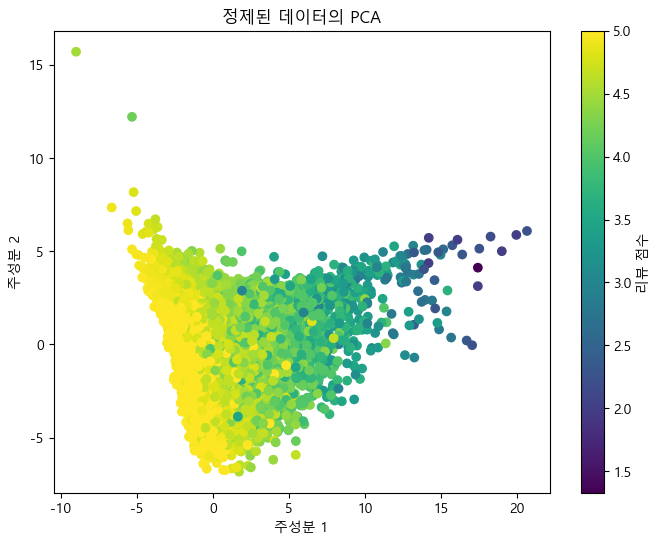

In [59]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

추출한 주성분으로 회귀분석

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_pca.values  # 주성분들의 값만 추출
y = df_regression['리뷰점수'].values  # 종속변인 추출

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [61]:
# 모델 평가
y_pred = lr.predict(X_test)

In [62]:
y_pred

array([4.81145961, 4.93762851, 4.91920313, ..., 4.83491998, 4.87286243,
       4.89950633])

In [63]:
y_test

array([4.8 , 4.75, 5.  , ..., 4.6 , 5.  , 5.  ])

In [64]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.12
MAE: 0.08


In [65]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.87


In [66]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.72


In [67]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택

X = df_pca[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.424e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:37:55   Log-Likelihood:                 20007.
No. Observations:               27084   AIC:                        -3.999e+04
Df Residuals:                   27071   BIC:                        -3.988e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7194      0.001   6717.290      0.0

리뷰 점수와 상관계수가 있는 6개의 컬럼으로 pca분석을 돌린 주성분 4개의 회귀모델 R-squared = 0.854
 - 주성분 4개 이유 : 4개 넣어야. 90%를 넘겼음.
 - [0.64872037, 0.12489846, 0.10042543, 0.05315938]
<br>

전체 데이터(범주형 데이터 제외한 df) 19개 중 pca분석을 통해 나온 주성분 12개의 회귀모델 R-squared = 0.854
 - 주성분 12개 이유 : 12개 넣어야. 90%를 넘겼음.
 - [0.22076125, 0.16796894, 0.15590424, 0.06378205, 0.05295055, 0.05225754, 0.04827873, 0.04056497, 0.03816209, 0.03280494, 0.02871818, 0.01855913]

결과 : 
- 두 경우의 R-squared 가 똑같음.
- 다만 둘 다 90을 넘지 못하였음.

# 공통 요인 분석 진행

In [68]:
!pip install factor-analyzer

Defaulting to user installation because normal site-packages is not writeable


In [69]:
# 필요한 라이브러리 불러오기
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [70]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df_clean) 

# 결과 출력
print(fa.loadings_)


[[-0.14442961  0.06836882]
 [-0.05905901  0.86655308]
 [ 0.03044254  0.42880456]
 [ 0.03943446  0.81514853]
 [-0.04070425  0.7857869 ]
 [ 0.05679835  0.67136646]
 [ 0.02582029  0.02409558]
 [-0.00509543 -0.01024143]
 [ 0.1135052  -0.21810408]
 [ 0.09901397 -0.16749152]
 [ 0.9525712  -0.01508328]
 [ 0.9039049  -0.03697598]
 [ 0.79634712 -0.02504795]
 [ 0.73246447 -0.05985349]
 [ 0.80285954 -0.04350829]
 [ 0.58794598  0.0387947 ]
 [ 0.8993982  -0.06849301]
 [ 0.09743988 -0.20065829]
 [ 0.12637875 -0.23734722]
 [ 0.31572898 -0.08111173]]


In [71]:
import pandas as pd

# 결과를 df로 변환 
loadings_df = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2'])
loadings_df

,Factor1,Factor2
0,-0.144430,0.068369
1,-0.059059,0.866553
2,0.030443,0.428805
3,0.039434,0.815149
4,-0.040704,0.785787
5,0.056798,0.671366
6,0.025820,0.024096
7,-0.005095,-0.010241
8,0.113505,-0.218104
9,0.099014,-0.167492


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27084 entries, 0 to 90211
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         27084 non-null  float64
 1   수용_인원수       27084 non-null  int64  
 2   욕실수          27084 non-null  float64
 3   침실수          27084 non-null  float64
 4   침대수          27084 non-null  float64
 5   숙소_가격        27084 non-null  float64
 6   최소_숙박일       27084 non-null  int64  
 7   최대_숙박일       27084 non-null  int64  
 8   리뷰수          27084 non-null  int64  
 9   30일_리뷰수      27084 non-null  int64  
 10  리뷰점수         27084 non-null  float64
 11  숙소_정확성_리뷰점수  27084 non-null  float64
 12  숙소_청결도_리뷰점수  27084 non-null  float64
 13  숙소_체크인_리뷰점수  27084 non-null  float64
 14  숙소_소통_리뷰점수   27084 non-null  float64
 15  숙소_위치_리뷰점수   27084 non-null  float64
 16  숙소_가격_리뷰점수   27084 non-null  float64
 17  평균_리뷰수       27084 non-null  float64
 18  12개월_리뷰수     27084 non-null  int64  
 19  좋은숙소     

In [73]:
loadings_df[loadings_df['Factor1'] >= 0.6]

,Factor1,Factor2
10,0.952571,-0.015083
11,0.903905,-0.036976
12,0.796347,-0.025048
13,0.732464,-0.059853
14,0.802860,-0.043508
16,0.899398,-0.068493


Factor1에서 높은 유사성을 나타낸 값들<br>
10  리뷰점수<br>
11  숙소_정확성_리뷰점수<br>
12  숙소_청결도_리뷰점수<br>
13  숙소_체크인_리뷰점수<br>
14  숙소_소통_리뷰점수<br>
16  숙소_가격_리뷰점수<br>
리뷰점수 + 리뷰 상세 항목들(위치항목 제외)

해당 결과는 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성한 것임.

In [74]:
loadings_df[loadings_df['Factor2'] >= 0.6]

,Factor1,Factor2
1,-0.059059,0.866553
3,0.039434,0.815149
4,-0.040704,0.785787
5,0.056798,0.671366


Factor2에서 높은 유사성을 나타낸 값들<br>
1   수용_인원수<br>
2   욕실수<br>
3   침실수<br>
4   침대수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

확인 결과 : 
 - 상관관계에서 나타났던 값들끼리 나왔음.
 - 결과를 보니 요인 분석 중 공통요인분석을 진행한 것 같음.
 - - ② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.

잘못된 부분이 있을 것 같아 새로 시작(회귀분석 과정에서 실패 이후)

먼저 모든 가능한 요인 수(n_factors=df_clean.shape[1])로 초기 공통요인 분석을 실행하여 각 요인의 고유값을 계산
 - 유값은 요인이 데이터 집합의 변동성을 얼마나 잘 설명하는지를 나타냄

In [75]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# FactorAnalyzer 초기화
fa = FactorAnalyzer(rotation=None, n_factors=df_clean.shape[1], method='principal')
fa.fit(df_clean)

# 고유값(Eigenvalues) 확인
ev, v = fa.get_eigenvalues()
print(ev)

[5.23871478 3.26775855 2.58911204 1.00779867 1.00145771 0.97151201
 0.90128913 0.80284311 0.74717126 0.72828317 0.54151867 0.43116356
 0.3304106  0.30723469 0.28243067 0.22711487 0.19318791 0.16692469
 0.15997214 0.10410179]


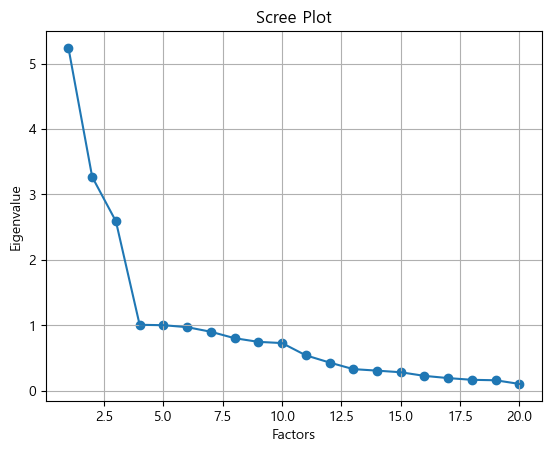

In [76]:
# 스크리 플롯으로 요인 수 결정
plt.scatter(range(1, df_clean.shape[1]+1), ev)
plt.plot(range(1, df_clean.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

고유값이 1 이상인 요인들은 데이터 집합의 중요한 변동성을 설명한다고 할 수 있으므로, 이를 기준으로 요인 수를 결정
 - 일반적으로 고유값이 1 이상인 요인을 선택
 - 마지막으로, 결정된 요인 수로 요인 분석을 재실행하고, 요인 회전(rotation="varimax")을 적용하여 요인의 해석을 용이하게 함

In [77]:
# 요인 수 결정 (예: 고유값이 1 이상인 요인 수)
n_factors = sum(ev > 1)

# 요인 분석 재실행, 이번에는 요인 수 지정
fa = FactorAnalyzer(rotation="varimax", n_factors=n_factors)
fa.fit(df_clean)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

요인 부하량 확인하기<br>
요인 부하량은 각 변수가 요인에 어떻게 연관되어 있는지를 보여줍니다. 높은 절대값을 가진 부하량은 해당 변수가 요인과 강하게 연관되어 있음을 의미합니다.

In [78]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df_clean.columns))

                    0         1         2         3         4
숙소_수        -0.148677  0.031768 -0.022524 -0.039478  0.085256
수용_인원수      -0.105241  0.899658  0.057450 -0.104275  0.069368
욕실수          0.010248  0.412555 -0.039426 -0.005366  0.091906
침실수          0.002850  0.829051 -0.042187 -0.038090  0.033180
침대수         -0.078162  0.842390  0.014358 -0.039863 -0.023570
숙소_가격        0.020655  0.605144 -0.101741 -0.099977  0.779940
최소_숙박일       0.030139 -0.006327 -0.111649 -0.019124  0.017165
최대_숙박일      -0.004521 -0.003841  0.002827  0.029341 -0.003545
리뷰수          0.113627 -0.065690  0.407872  0.540214  0.021766
30일_리뷰수      0.077521 -0.032897  0.744713 -0.007833 -0.002510
리뷰점수         0.954869  0.007065 -0.024622 -0.069136  0.007597
숙소_정확성_리뷰점수  0.905421 -0.009269 -0.012101 -0.034463  0.009163
숙소_청결도_리뷰점수  0.795176 -0.010987  0.007430 -0.047182  0.058358
숙소_체크인_리뷰점수  0.737624 -0.015931 -0.013629  0.021286 -0.048545
숙소_소통_리뷰점수   0.807377  0.008408  0.004143 -0.011343 -0.074250
숙소_위치_리뷰

0.6 이상으로 묶어보면<br>

0 : 리뷰점수, 정확성, 청결고, 체크인, 소통, 가격_리뷰점수<br>
1 : 수용인원수, 욕실수, 침실수, 침대수<br>
2 : 30일리뷰수, 평균리뷰수, 12개월리뷰수<br>
3 : 리뷰수

요인 점수 계산하기<br>
요인 점수는 관측된 변수들의 값으로부터 각 요인에 대한 개별 관측치(예: 사람, 경우 등)의 점수를 계산합니다. 이 점수는 후속 분석에서 사용될 수 있습니다.

In [79]:
# 요인 점수 계산
factor_scores = fa.transform(df_clean)
print(factor_scores)

[[ 0.90577971 -0.43326892 -0.43972091  1.44443497  0.88390995]
 [ 0.09698936 -0.92551696 -0.90579885 -0.19110647 -0.44036337]
 [ 0.30108366 -0.6201534  -0.77790102 -0.16462887  0.16360152]
 ...
 [ 0.87219498 -0.329598    1.59212163 -2.80785839  0.51993184]
 [-0.33757879 -0.79876257  0.92109479 -1.92809076 -0.70130467]
 [ 0.85093563 -0.45617906  2.15452017 -3.32066536  0.43796773]]


회귀 모델 분석
 - 리뷰점수

In [80]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['리뷰점수']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.078e+05
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:38:05   Log-Likelihood:                 34231.
No. Observations:               27084   AIC:                        -6.845e+04
Df Residuals:                   27078   BIC:                        -6.840e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7194      0.000   1.14e+04      0.0

요인 분석 결론 :
 - PCA 분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.854
 - 공통요인분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.954

공통요인 분석 결과가 훨씬 좋게 나왔고, 90%를 넘었기에 채택가능

회귀 모델 분석
 - 숙소_가격

In [81]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['숙소_가격']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.652e+06
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:38:05   Log-Likelihood:                -74198.
No. Observations:               27084   AIC:                         1.484e+05
Df Residuals:                   27078   BIC:                         1.485e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.6193      0.023   5826.113      0.0

숙소_가격에 대해서는 설명력이 매우 떨어짐